# Areal Project

<div>
<img src="logo.jpg" width=150 ALIGN="left" border="20">
<h1> Starting Kit for Pre-processed data</h1>
<br>This code was tested with <br>
Python 3.6.7 <br>
Created by Areal Team <br><br>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div>
    <h2>Introduction </h2>
     <br>
Aerial imagery has been a primary source of geographic data for quite a long time. With technology progress, aerial imagery became really practical for remote sensing : the science of obtaining information about an object, area or phenomenon.
Nowadays, there are many uses of image recognition spanning from robotics/drone vision to autonomous driving vehicules or face detection.
<br>
In this challenge, we will use pre-processed data, coming from landscape images. The goal is to learn to differentiate common and uncommon landscapes such as a beach, a lake or a meadow.
    Data comes from part of the data set (NWPU-RESISC45) originally used in <a href="https://arxiv.org/pdf/1703.00121.pdf?fbclid=IwAR16qo-EX_Z05ZpxvWG8F-oBU0SlnY-3BPCWBVVOGPyJcVy7BBqCKjnsvJo">Remote Sensing Image Scene Classification</a>. This data set contains 45 categories while we only kept 13 out of them.

References and credits: 
Yuliya Tarabalka, Guillaume Charpiat, Nicolas Girard for the data sets presentation.<br>
Gong Cheng, Junwei Han, and Xiaoqiang Lu, for the original article on the chosen data set.
</div>

### Requirements 

Our code uses multiple libraries, so if you encounter an error, you probably lack one of them.
In that case, uncomment and run the next cell.

In [26]:
#!pip install --user -r requirements.txt

In [1]:
import numpy as np
import random
import re

In [2]:
model_dir = "sample_code_submission"
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

In [3]:
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);

In [4]:
from model import BasicCNN

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
</div>

In [5]:
data_dir = 'sample_data'
data_name = 'Areal'

In [6]:
from ingestion_program.data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)

Reading sample_data/Areal_train from AutoML format
Number of examples = 65
Number of features = 196608
        Class
0       beach
1   chaparral
2       cloud
3      desert
4      forest
5      island
6        lake
7      meadow
8    mountain
9       river
10        sea
11   snowberg
12    wetland
Number of classes = 13


In [7]:
# print(data.head(1))
data.head()

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_256_254_R,pixel_256_254_G,pixel_256_254_B,pixel_256_255_R,pixel_256_255_G,pixel_256_255_B,pixel_256_256_R,pixel_256_256_G,pixel_256_256_B,target
0,23,26,31,23,26,31,24,27,32,24,...,53,54,58,39,40,44,50,51,55,sea
1,135,126,111,142,133,118,144,135,120,138,...,155,140,121,154,139,120,159,144,125,chaparral
2,236,241,244,235,240,243,234,239,242,235,...,151,156,159,152,157,160,159,164,167,snowberg
3,26,27,32,27,28,33,28,29,34,29,...,33,33,35,32,32,34,31,31,33,island
4,45,64,60,45,64,60,46,65,61,46,...,26,45,39,11,30,24,46,65,59,sea


In [8]:
data.describe()

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_256_253_B,pixel_256_254_R,pixel_256_254_G,pixel_256_254_B,pixel_256_255_R,pixel_256_255_G,pixel_256_255_B,pixel_256_256_R,pixel_256_256_G,pixel_256_256_B
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,94.630769,97.953846,88.584615,95.230769,98.538462,89.107692,95.661538,98.907692,89.461538,96.230769,...,86.061538,85.876923,90.323077,82.123077,85.061538,89.430769,81.400000,87.553846,92.184615,84.000000
std,62.544377,51.831587,51.066713,63.382216,52.755947,51.764528,62.877181,51.762294,50.774956,63.114670,...,44.360342,58.938397,47.980174,45.363638,60.035374,48.742297,45.500962,59.485300,47.718868,43.852024
min,4.000000,7.000000,0.000000,9.000000,12.000000,3.000000,11.000000,14.000000,5.000000,10.000000,...,19.000000,15.000000,22.000000,8.000000,10.000000,11.000000,5.000000,17.000000,19.000000,14.000000
25%,50.000000,65.000000,51.000000,52.000000,63.000000,48.000000,52.000000,65.000000,53.000000,51.000000,...,45.000000,39.000000,53.000000,44.000000,38.000000,52.000000,43.000000,43.000000,53.000000,45.000000
50%,67.000000,79.000000,69.000000,66.000000,79.000000,75.000000,67.000000,78.000000,71.000000,71.000000,...,76.000000,64.000000,77.000000,72.000000,62.000000,72.000000,73.000000,62.000000,78.000000,73.000000
75%,135.000000,132.000000,130.000000,142.000000,133.000000,130.000000,137.000000,135.000000,127.000000,137.000000,...,119.000000,135.000000,127.000000,118.000000,134.000000,120.000000,120.000000,142.000000,132.000000,125.000000
max,246.000000,242.000000,244.000000,242.000000,240.000000,243.000000,240.000000,239.000000,242.000000,243.000000,...,236.000000,232.000000,230.000000,236.000000,233.000000,210.000000,218.000000,234.000000,195.000000,194.000000


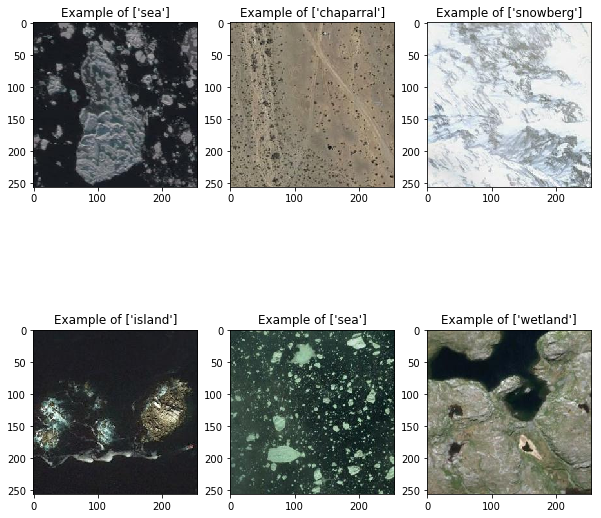

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

num_toshow = 6
fig, _axs = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.values[i][:-1].reshape(256,256,3)
    label = data.values[i][-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img.astype(float) / 255)

plt.show()

In [10]:
print(data.iloc[:, -1:])
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

       target
0         sea
1   chaparral
2    snowberg
3      island
4         sea
5     wetland
6      forest
7   chaparral
8     wetland
9      desert
10     forest
11      river
12     island
13   snowberg
14   snowberg
15      beach
16    wetland
17     forest
18     meadow
19     meadow
20     meadow
21   mountain
22      river
23     island
24     forest
25        sea
26        sea
27      beach
28      cloud
29     island
..        ...
35      river
36      cloud
37  chaparral
38      beach
39      river
40       lake
41       lake
42   mountain
43     desert
44      river
45      cloud
46     meadow
47    wetland
48    wetland
49      beach
50        sea
51      cloud
52      beach
53       lake
54     forest
55     island
56   snowberg
57       lake
58   mountain
59       lake
60      cloud
61   snowberg
62     desert
63  chaparral
64  chaparral

[65 rows x 1 columns]


# Step 2 : Building a predictive model

In [11]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/sample_data/Areal_public.info
DataManager : Areal
info:
	usage = Sample dataset Areal data
	name = areal
	task = multiclass.classification
	target_type = Categorical
	feat_type = Numerical
	metric = accuracy
	time_budget = 12000
	feat_num = 196608
	target_num = 13
	label_num = 13
	train_num = 65
	valid_num = 13
	test_num = 0
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(65, 196608)
	Y_train = array(65, 1)
	X_valid = array(13, 196608)
	Y_valid = array(13, 1)
	X_test = array(13, 196608)
	Y_test = array(13, 1)
feat_type:	array(196608,)
feat_idx:	array(0,)



In [12]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

### Use of the baseline model

Using our BasicCNN model needs some specific libraries, so if you encounter unknown module errors, you probably lack one of them. Go up and run the cell below requirements.

In case you have them but still encounter errors related to them, you should probably do an upgrade : 

    pip install -U torch  /   pip install -U torchvision

In [13]:
m = BasicCNN(verbose=True)
trained_model_name = model_dir + data_name

In [14]:
m.fit(X_train, Y_train)

Epoch 0 : loss = 2.565374
Epoch 1 : loss = 2.559882
Epoch 2 : loss = 2.545674
Epoch 3 : loss = 2.523497
Epoch 4 : loss = 2.495657
Epoch 5 : loss = 2.472177
Epoch 6 : loss = 2.456405
Epoch 7 : loss = 2.440153
Epoch 8 : loss = 2.419657
Epoch 9 : loss = 2.402684


In [15]:
Y_hat_train = m.predict(D.data['X_train'])
Y_hat_valid = m.predict(D.data['X_valid'])
Y_hat_test = m.predict(D.data['X_test'])

In [16]:
# m.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/Areal_test.predict
sample_result_submission/Areal_train.predict
sample_result_submission/Areal_valid.predict


# Scoring the result

In [17]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: accuracy


In [18]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the accuracy metric = 0.1538
Ideal score for the accuracy metric = 1.0000


## confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, Y_hat_train)

array([[0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0]])

## cross validation

In [20]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [21]:
scores = cross_val_score(BasicCNN(), X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


CV score (95 perc. CI): 0.09 (+/- 0.18)


# Submission

## Example

Example needs to have python3 installed

Test to see whether submission with ingestion program is working

In [22]:
!python3 $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Using input_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/sample_data
Using output_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/sample_result_submission
Using program_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/ingestion_program
Using submission_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Areal ********
************************************************
========= Reading and converting data ==========
Info file found : /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/sample_data/Areal_public.info
========= Reading /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/sample_data/Areal_feat.type
[+] Success in  0.17 sec
========= Reading /home/keanu/Docum

### Test scoring program

In [23]:
scoring_output_dir = 'scoring_output'
!python3 $score_dir/score.py $data_dir $result_dir $scoring_output_dir

======= Set 1 (Areal_test): accuracy(set1_score)=0.000000000000 =======
======= Set 2 (Areal_train): accuracy(set2_score)=0.153846153846 =======
======= Set 3 (Areal_valid): accuracy(set3_score)=0.153846153846 =======


# Prepare the submission

In [24]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_18-12-03-19-39.zip
../sample_result_submission_18-12-03-19-39.zip
